In [1]:
from IPython.display import IFrame

In [6]:
IFrame("hw1.pdf", width=1000, height=1000)

# Responses

## Problem 1

__[d]__
1. Not learning--recall that one of the key components of a problem that requires Learning is that the target function is __unknown__. In this case, we have exact specifications we can use to classify coins. 
2. Supervised Learning--we have labeled coins and want to infer decision boundaries so that we can infer a target function that tells us which coins belong to which category. This is not Unsupervised because __we are given labels__.
3. Reinforcement Learning--this uses a penalty/reward system to iteratively improve Tic-Tac-Toe playing. 

## Problem 2

__[a]__--(ii) and (iv) are good choices for ML. In (ii), we don't know exactly how to weight/value certain things from a credit card transaction to decide whether it is fraudulent, but we can learn it (given data). Similarly, determining the optimal cycle for traffic lights depends on a number of variables, and it's non-trivial to decide how to weight/use them. 

## Problem 3

__[c]__
For the first bag, $ \mathbb{P}[pick \ black \ | \ picked \ black]_1 = 1 $ since there are 2 black balls. For the second, since there is one black and one white ball, $ \mathbb{P}[pick \ black \ | \ picked \ black]_2 = 0 $. The probability of picking either bag is $ \dfrac{1}{2} $, so the total probability that the second ball we pick is black after randomly selecting one of the two bags is $$ \dfrac{1}{2} \cdot \mathbb{P}[pick \ black \ | \ picked \ black]_1 + \dfrac{1}{2} \cdot \mathbb{P}[pick \ black \ | \ picked \ black]_2 = \dfrac{1}{2} $$

## Problem 4

__[b]__
If we draw ten marbles, then the probality we get no reds is $$ \mathbb{P}[\nu = 0] = \mathbb{P}[drew \ ten \ greens] = 0.45^{10} = 3.405 \times 10^{-4}. $$

## Problem 5

In [2]:
import numpy as np

In [12]:
s = np.random.uniform(0,1,2)

In [13]:
s

array([ 0.36057611,  0.57849578])

In [14]:
for sample in s:
    print(sample)

0.360576106197
0.5784957793


In [15]:
prob_red = 0.55
def draw_sample(prob, num_samples):
    s = np.random.uniform(0,1,num_samples)
    return s

We want the probability that at least one sample of 10 marbles out of 1000 has $ \nu = 0 $. That's one minus the probability that no sample has $\nu = 0$, or the probability that all samples have at least one red marble.

The probability that an individual sample has at least one red marble comes from the last problem--it is 1 minus the answer we got there, or $$ 0.99965949371. $$

So this means that we draw 1000 red marbles. So $$ \mathbb{P}[\text{at least one } \nu = 0] = 1 - \mathbb{P}[\text{no} \nu = 0] $$ $$ = 1 - 0.99965949371^{1000} \approx 0.289 . $$

The answer is __[c]__

## Problem 6

There are 8 possible target functions that agree with $\textit{D}$. If we actually inspect the 5 training examples, we notice that an XOR of the three values would agree with everything there.

## Problems 7-10

In [21]:
def pick_two_random_points():
    # returns two random values, each in [-1,1]
    pt1 = np.random.uniform(-1,1,2)
    pt2 = np.random.uniform(-1,1,2)
    return pt1,pt2

In [3]:
import matplotlib.pyplot as plt
% matplotlib inline

In [36]:
def draw_line_from_random_pts():
    pt1, pt2 = pick_two_random_points()
    # compute coefficients
    coefficients = np.polyfit([pt1[0], pt1[1]], [pt2[0], pt2[1]], 1) 

    # create a polynomial object with the coefficients
    polynomial = np.poly1d(coefficients)

    # for the line to extend beyond the two points, 
    # create the linespace using the min and max of the x_lim
    # I'm using -1 and 1 here
    x_axis = np.linspace(-1, 1)

    # compute the y for each x using the polynomial
    y_axis = polynomial(x_axis)
    
    fig = plt.figure()
    axes = plt.axes()
    axes.plot(x_axis, y_axis)
    plt.axhline(0, color='k')
    plt.axvline(0, color='k')
    axes.plot(pt1[0], pt2[0], pt1[1], pt2[1], marker='o', color='red')

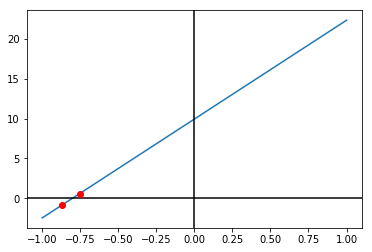

In [37]:
draw_line_from_random_pts()

In [32]:
pt1, pt2 = pick_two_random_points()

In [33]:
# compute coefficients
coefficients = np.polyfit([pt1[0], pt1[1]], [pt2[0], pt2[1]], 1)

# create a polynomial object with the coefficients
polynomial = np.poly1d(coefficients)

In [34]:
polynomial # coeff

poly1d([ 1.03485446, -0.40126896])

In [35]:
coefficients

array([ 1.03485446, -0.40126896])

So the first element of coefficients is the weight, while the second is the bias.

In [46]:
dataset = np.random.uniform(-1,1,10) # create dataset of size 10.

In [22]:
def create_target_function():
    """
    create target function by initializing a line passing thru two random points in R2.
    """
    pt1, pt2 = pick_two_random_points()
    
    # compute coefficients
    coefficients = np.polyfit([pt1[0], pt1[1]], [pt2[0], pt2[1]], 1)
    
    weight = coefficients[0]
    bias = coefficients[1]
    
    return weight, bias

In [242]:
def create_target_function_new():
    """
    create target function by initializing a line passing thru two random points in R2.
    """
    x1 = random.uniform(-1,1)
    x2 = random.uniform(-1,1)
    y1 = random.uniform(-1,1)
    y2 = random.uniform(-1,1)
    
    target_function = (x1,y1,x2,y2)
    
    return target_function

In [234]:
def run_target_function(point, target_function, debug=False):
    """
    take a point in the dataset and return the value 1 or -1, depending on if it's above/below the line.
    """
    print("point  is: " + str(point))
    if debug:
        print("target function: " + str(target_function))
    (weight, bias) = target_function
    
    x1, x2 = point[1], point[2] # b/c x[0] = x_0 is 1
    if weight*x1 + bias <= x2:
        return 1
    else:
        return -1

In [119]:
def create_dataset(size):
    dataset = []
    for i in range(size):
        x = np.random.uniform(-1,1,2) # generate (x,y)
        x = np.insert(x,0,1)
        dataset.append(x)
        
    return dataset

In [160]:
def eval_target_function(dataset, target_function):
    """
    dataset will be an array of points in R2
    target_function is a pair of values (weight, bias)
    
    use the target function with the dataset, return an array of values representing y values for each data point.
    Say that we give 1 prediction if x is "above" the line. That is, (x1,x2) is above the line y = mx+b if
    y1 = mx1 + b < x2
    """
    (one, weight, bias) = target_function
    # weight, bias = create_target_function() # line is weight*x + bias
    y = np.zeros(len(dataset)) # size 10
    
    for index in range(len(dataset)):
        x = dataset[index]
        x1, x2 = x[1], x[2]
        if weight*x1 + bias <= x2:
            prediction = 1
        else:
            prediction = -1
        y[index] = prediction
        
    return y

In [62]:
dataset = create_dataset(size=10)

In [63]:
dataset

[array([ 0.96931462, -0.82981663]),
 array([ 0.36924486,  0.45931993]),
 array([-0.57090423, -0.96858732]),
 array([-0.63475047,  0.33644747]),
 array([ 0.10710692, -0.52540432]),
 array([-0.85902423, -0.07505821]),
 array([-0.64696782,  0.3620291 ]),
 array([-0.50893985, -0.61079892]),
 array([-0.25689862,  0.00222871])]

In [64]:
y = eval_target_function(dataset)

In [65]:
y

array([-1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [45]:
def perceptron_random_pts(value):
    # used to evaluate training examples.
    x = value[0]
    y = value[1]
    weight, bias = create_target_function()
    
    if weight*x + bias >= 0: 
        prediction = 1
    else:
        prediction = -1
    
    
    # check that prediction matches value of y in the training sample
    if prediction == y:
        return True
    else:
        return False

In [294]:
def misclassified(value, target_function, w):
    """
    tells us if hypothesis output for a training example is correct or not, based on target function.
    """
    (x1,y1,x2,y2) = target_function
    x = value[1]
    y = value[2]
    
    true_val = targetFunction(x1,y1,x2,y2,x,y)
    hypothesis = np.sign(np.inner(w,value))
    
#     print("true val:" + str(true_val))
#     print("hypothesis:  " + str(hypothesis))
#     print('true val: '+ str(true_val))
    
    return not (hypothesis == true_val) # true if the value is indeed misclassified.

In [69]:
import random

In [72]:
np.multiply(3, [2,2])

array([6, 6])

In [74]:
np.sign(-6)

-1

In [279]:
def get_all_misclassified(dataset, target_function, weight_vector):
    (x1,y1,x2,y2) = target_function # unpack
    misclassified_vals = []
    for index in range(len(dataset)):
        # print("value: " + str(dataset[index]))
        # hypothesis = np.sign(np.inner(weight_vector, dataset[index]))
        # print("hypothesis: " + str(hypothesis))
        if misclassified(dataset[index], target_function, weight_vector):
            misclassified_vals.append(dataset[index])
            
    return misclassified_vals

In [292]:
def PLA(dataset, target_function, debug=False):
    """
    the Perceptron Learning Algorithm, for full dataset
    """
    #y_vals = eval_target_function(dataset, target_function) # get the array of y values for each point in dataset.
    
    (x1,y1,x2,y2) = target_function # unpack values
    w = np.zeros(3) # init weight vector to 3 zeros: inner product of w,x is 0 --> sign(wTx) = 0
    num_iters = 0 # keep track of num iterations
    
    misclassified_vals = dataset
    
    done = False
    
    while not done:
        num_wrong = 0
        for point in misclassified_vals:
            x,y = point[1], point[2]
            if np.sign(np.dot(w,point)) != targetFunction(x1, y1, x2, y2, x, y):
                w = np.add(w, targetFunction(x1, y1, x2, y2, x, y) * point) # move w in right direction
                num_wrong += 1
                num_iters += 1
                misclassified_vals = get_all_misclassified(dataset, target_function, w)
                break

        if num_wrong == 0:
            done = True
        
    # now that nothing is misclassified, we get our hypothesis as a vector
    g = []
    f = []
    for point in dataset:
        x,y = point[1],point[2]
        prediction = np.sign(np.dot(w,point))
        true_val = targetFunction(x1,y1,x2,y2,x,y)
        g.append(prediction)
        f.append(true_val)
        
    if debug:
        print("g is: " + str(g))
        
    # calcualte P[g != f] where f was the target function.
    size = len(g)
    num_wrong = 0
    for i in range(size):
        if debug:
            print("i is: " + str(i))
        if g[i] != f[i]:
            num_wrong += 1
            
    prob_different = num_wrong / size # this is the probability P[g != f] where g is the hypothesis values.
    
    return w, num_wrong, num_iters, prob_different

In [202]:
import random
def generatePoints(numberOfPoints):
##    random.seed(1) # used for testing
    x1 = random.uniform(-1, 1)
    y1 = random.uniform(-1, 1)
    x2 = random.uniform(-1, 1)
    y2 = random.uniform(-1, 1)
    points = []

    for i in range (0,numberOfPoints - 1):
##        random.seed(1) # used for testing
        x = random.uniform (-1, 1)
        y = random.uniform (-1, 1)
        points.append([1, x, y, targetFunction(x1, y1, x2, y2, x, y)]) # add 1/-1 indicator to the end of each point list
    return x1, y1, x2, y2, points

In [200]:
# This function determines the cross product between a line and a given point.
# Returns 1 if above the line and -1 if below the line.
def targetFunction(x1,y1,x2,y2,x3,y3):
    u = (x2-x1)*(y3-y1) - (y2-y1)*(x3-x1)
    if u >= 0:
        return 1
    elif u < 0:
        return -1

In [205]:
a = 3
b = np.ones(3)
np.multiply(a,b)

array([ 3.,  3.,  3.])

In [219]:
def train(training_points, iterationLimit):
    w = np.zeros(3) # initialize weights for w[0], w[1], w[2]
    learned = False
    iterations = 0 # keep track of the iteration count   
    
    def updateWeights():
        random.shuffle(training_points) # randomize training points
        for point in training_points:
            result = np.sign(np.dot(np.delete(point,3),w)) # caclulate point and determine its sign.
            if point[3] != result: # does sample point's result match our calculated result?
                # Use line below to watch the perceptron's weights change
                # print str(iterations) + " " + str(w) + " " + str(result) + " " + str(point) + " " + str(perceptronCalc(point))

                # if not update weights by sample point's result
                w[0] += point[0]*point[3]
                w[1] += point[1]*point[3]
                w[2] += point[2]*point[3]

                return False # break out of loop and return
        return True # if the loop reaches this point all calculated points in the training points match their expected y's

    while not learned:
        iterations += 1
        noErrors = updateWeights() 
        if iterations == iterationLimit or noErrors:
            learned = True
            break

    return iterations, w

In [221]:
def findErrorProbability(x1,y1,x2,y2, weights, numberToTest):
    numberOfErrors = 0
    for i in range(0, numberOfPointsToTest-1):
        #generate random test points
        x = random.uniform(-1,1)
        y = random.uniform(-1,1)

        #compare results from target function and hypothesis function
        if targetFunction(x1,y1,x2,y2,x,y) != sign(perceptronCalc([1,x,y], weights)):
            numberOfErrors += 1 # keep track of errors
    return numberOfErrors/float(numberOfPointsToTest)

In [203]:
x1, y1, x2, y2, dataset = generatePoints(10)

In [217]:
dataset

[[1, 0.7338692005982985, 0.2519292318485322, 1],
 [1, -0.8048279501491169, -0.5177877029162006, -1],
 [1, -0.4674259999554291, 0.47943169247895545, -1],
 [1, -0.37107287405338996, -0.5585314019025338, 1],
 [1, 0.5082541952443318, -0.998929836722457, 1],
 [1, -0.3002255078536582, 0.15424006850325211, -1],
 [1, -0.9034533894573726, -0.28869413301408975, -1],
 [1, 0.7948797558594709, 0.6561499440681355, -1],
 [1, -0.5576156537160395, 0.5115474228381578, -1]]

In [220]:
train(dataset, 100)

(5, array([ 0.        ,  0.47136996, -0.67405798]))

In [244]:
dataset = create_dataset(10)

In [286]:
dataset

[array([ 1.        , -0.92338383,  0.98916691]),
 array([ 1.        ,  0.22988113,  0.18304782]),
 array([ 1.        ,  0.3148751 , -0.49586787]),
 array([ 1.        , -0.16223729, -0.64875484]),
 array([ 1.        , -0.82988826,  0.40856908]),
 array([ 1.        ,  0.94289996,  0.55484322]),
 array([ 1.        , -0.98607934,  0.2902161 ]),
 array([ 1.        , -0.10076322,  0.28280067]),
 array([ 1.        ,  0.0267917 , -0.73415667]),
 array([ 1.        ,  0.02189472,  0.39508103])]

In [284]:
target_function = create_target_function_new()

In [285]:
target_function

(-0.2707405925492208,
 0.6753123946446868,
 -0.054807597371394845,
 0.42269017626348004)

In [295]:
x1,y1,x2,y2 = target_function

In [296]:
for point in dataset:
    x,y = point[1],point[2]
    print(targetFunction(x1,y1,x2,y2,x,y))

-1
1
-1
-1
-1
1
-1
-1
-1
1


In [297]:
w, num_wrong, iters, prob = PLA(dataset, target_function)

In [298]:
w

array([-1.        ,  3.33357416,  2.388093  ])

In [299]:
for point in dataset:
    print(np.sign(np.dot(w,point)))

-1.0
1.0
-1.0
-1.0
-1.0
1.0
-1.0
-1.0
-1.0
1.0


In [300]:
num_wrong

10

In [262]:
w = np.zeros(3)

In [255]:
misclassified = get_all_misclassified(dataset, target_function, w)

done = False

In [257]:
point = misclassified[0]

In [258]:
x,y = point[1], point[2]
x,y

(-0.98607934309661482, 0.29021609814980875)

In [259]:
np.sign(np.dot(w,point)) == targetFunction(x1,y1,x2,y2,x,y)

False

In [263]:
w = np.add(w,targetFunction(x1,y1,x2,y2,x,y)*point)

In [264]:
w

array([-1.        ,  0.98607934, -0.2902161 ])

In [272]:
dataset

[array([ 1.        , -0.92338383,  0.98916691]),
 array([ 1.        ,  0.22988113,  0.18304782]),
 array([ 1.        ,  0.3148751 , -0.49586787]),
 array([ 1.        , -0.16223729, -0.64875484]),
 array([ 1.        , -0.82988826,  0.40856908]),
 array([ 1.        ,  0.94289996,  0.55484322]),
 array([ 1.        , -0.98607934,  0.2902161 ]),
 array([ 1.        , -0.10076322,  0.28280067]),
 array([ 1.        ,  0.0267917 , -0.73415667]),
 array([ 1.        ,  0.02189472,  0.39508103])]

In [273]:
np.inner(w,dataset[0])

-2.1976018845397824

In [274]:
np.inner(dataset[0],w)

-2.1976018845397824

In [276]:
for index in range(len(dataset)):
    print(np.sign(np.inner(w, dataset[index])))

-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0


In [280]:
misclassified = get_all_misclassified(dataset, target_function, w)

true val:1
hypothesis:  -1.0
true val:-1
hypothesis:  -1.0
true val:-1
hypothesis:  -1.0
true val:-1
hypothesis:  -1.0
true val:1
hypothesis:  -1.0
true val:-1
hypothesis:  -1.0
true val:1
hypothesis:  -1.0
true val:-1
hypothesis:  -1.0
true val:-1
hypothesis:  -1.0
true val:-1
hypothesis:  -1.0


In [281]:
misclassified

[array([ 1.        , -0.92338383,  0.98916691]),
 array([ 1.        , -0.82988826,  0.40856908]),
 array([ 1.        , -0.98607934,  0.2902161 ])]

In [282]:
while not done:
    num_wrong = 0
    for point in misclassified:
        x,y = point[1], point[2]
        if np.sign(np.dot(w,point)) != targetFunction(x1, y1, x2, y2, x, y):
            w = np.add(w, targetFunction(x1, y1, x2, y2, x, y) * point) # move w in right direction
            num_wrong += 1
            num_iters += 1
            misclassified = get_all_misclassified(dataset, target_function, w)
            break

    if num_wrong == 0:
        done = True

In [283]:
w

array([-1.        ,  0.98607934, -0.2902161 ])

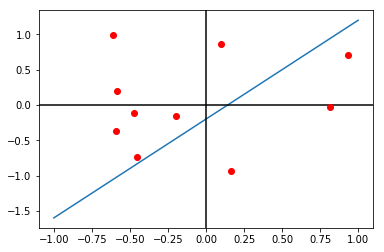

In [231]:
params = target_function

poly =  np.poly1d(params)
x_new = np.linspace(-1, 1)
y_new = poly(x_axis)

fig = plt.figure()
axes = plt.axes()
axes.plot(x_new, y_new)
plt.axhline(0, color='k')
plt.axvline(0, color='k')
axes.plot(x_vals, y_vals, 'ro')
plt.show()

In [239]:
PLA(dataset, target_function)

point  is: [ 1.         -0.24594098 -0.13954831]
point  is: [ 1.         -0.24594098 -0.13954831]
point  is: [ 1.          0.55668525 -0.07071001]
point  is: [ 1.          0.55668525 -0.07071001]
point  is: [ 1.          0.04830557  0.58596337]
point  is: [ 1.          0.04830557  0.58596337]
point  is: [ 1.          0.55668525 -0.07071001]
point  is: [ 1.          0.55668525 -0.07071001]


(array([ 0.        , -1.31100591,  0.58783508]), 0, 4)

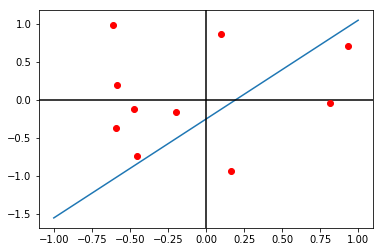

In [174]:
params = target_function

poly =  np.poly1d(params)
x_new = np.linspace(-1, 1)
y_new = poly(x_axis)

fig = plt.figure()
axes = plt.axes()
axes.plot(x_new, y_new)
plt.axhline(0, color='k')
plt.axvline(0, color='k')
axes.plot(x_vals, y_vals, 'ro')
plt.show()

In [175]:
eval_target_function(dataset, target_function)

array([ 1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1.])

In [189]:
target_function

(1.3, -0.25)

In [180]:
(weight, bias) = target_function

In [182]:
weight

1.3

In [193]:
w, num_wrong, num_iters = PLA(dataset, target_function)

In [194]:
w, num_wrong, num_iters

(array([ 0.        , -2.04567746,  1.21501666]), 0, 4)

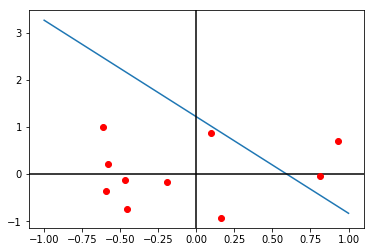

In [195]:
params = np.delete(w,0)

poly =  np.poly1d(params)
x_new = np.linspace(-1, 1)
y_new = poly(x_axis)

fig = plt.figure()
axes = plt.axes()
axes.plot(x_new, y_new)
plt.axhline(0, color='k')
plt.axvline(0, color='k')
axes.plot(x_vals, y_vals, 'ro')
plt.show()

In [197]:
for point in dataset:
    print(run_target_function(point, target_function))

1
1
1
1
-1
-1
1
1
1
-1


In [198]:
for point in dataset:
    print(np.dot(w, point))

2.45807799355
1.43700356874
0.854555254065
0.206701031841
-1.7037012671
-1.46442828176
0.0348541985785
0.763765565346
0.819393708905
-1.04798812099


In [169]:
w

array([ 0.        , -1.42491906,  1.02620359])

In [136]:
num_wrong, num_iters = PLA(dataset, target_function)

C:\Python35\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in add
C:\Python35\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in sign


KeyboardInterrupt: 

In [183]:
num_wrong, num_iters

(1, 3)

In [221]:
w = np.zeros(2)
num_iters = 0 # keep track of num iterations
    
indices = [i for i in range(len(dataset))]
misclassified_indices = indices # everything is misclassified

In [222]:
indices

[0, 1, 2]

In [225]:
get_all_misclassified(dataset, target_function, w)

ValueError: shapes (3,) and (4,) not aligned: 3 (dim 0) != 4 (dim 0)

In [224]:
y_vals = eval_target_function(dataset, target_function)

In [225]:
y_vals

array([-1., -1., -1.])

In [226]:
chosen_idx = random.choice(misclassified_indices)
print("chosen idx: " + str(chosen_idx))
chosen_value = dataset[chosen_idx]

# update weight vector: w <-- w + y_n * x_n
w = w + np.multiply(y_vals[chosen_idx], dataset[chosen_idx])

print("w: " + str(w))

chosen idx: 0
w: [-0.5569381   0.47479243]


In [227]:
get_all_misclassified(dataset, target_function, w)

value: [ 0.5569381  -0.47479243]
hypothesis: -1.0
true val: -1.0
value: [-0.19605403 -0.38043545]
hypothesis: -1.0
true val: -1.0
value: [-0.79218672 -0.28998409]
hypothesis: 1.0
true val: -1.0


[2]

In [232]:
w = [-0.5569381, 0.47479243]

In [233]:
misclassified_indices = get_all_misclassified(dataset, target_function, w)

value: [ 0.5569381  -0.47479243]
hypothesis: -1.0
true val: -1.0
value: [-0.19605403 -0.38043545]
hypothesis: -1.0
true val: -1.0
value: [-0.79218672 -0.28998409]
hypothesis: 1.0
true val: -1.0


In [234]:
misclassified_indices

[2]

In [235]:
chosen_idx = random.choice(misclassified_indices)
print("chosen idx: " + str(chosen_idx))
chosen_value = dataset[chosen_idx]

# update weight vector: w <-- w + y_n * x_n
w = w + np.multiply(y_vals[chosen_idx], dataset[chosen_idx])

print("w: " + str(w))

chosen idx: 2
w: [ 0.23524862  0.76477652]


In [236]:
get_all_misclassified(dataset, target_function, w)

value: [ 0.5569381  -0.47479243]
hypothesis: -1.0
true val: -1.0
value: [-0.19605403 -0.38043545]
hypothesis: -1.0
true val: -1.0
value: [-0.79218672 -0.28998409]
hypothesis: -1.0
true val: -1.0


[]

In [294]:
def run_experiments(dataset, num_experiments):
    """
    runs a number of experiments, returns average num iterations and correctness.
    """
    total_num_wrong = 0
    total_num_iters = 0
    
    for i in range(num_experiments):
        target_function = create_target_function() # create a new target function every iter
        
        num_wrong, num_iters = PLA(dataset, target_function)
        print("num wrong: " + str(num_wrong))
        print("num iters: " + str(num_iters))
        
        total_num_wrong += num_wrong
        total_num_iters += num_iters
        
    avg_wrong = total_num_wrong / num_experiments
    avg_iters = total_num_iters / num_experiments
    
    return avg_wrong, avg_iters

## Toying Around

First, create the dataset.

In [4]:
dataset = []

In [9]:
k = np.random.uniform(-1,1,2)

In [10]:
k

array([-0.65931984, -0.79239507])

In [13]:
k = np.insert(k,0,1)

In [14]:
k

array([ 1.        , -0.65931984, -0.79239507])

In [15]:
# make dataset size 10.
for i in range(10):
    x = np.random.uniform(-1,1,2) # generate (x,y)
    x = np.insert(x,0,1) # we want x_0 = 1.
    dataset.append(x)

In [16]:
dataset

[array([ 1.        , -0.83357909, -0.65557992]),
 array([ 1.        , -0.62108246,  0.26966018]),
 array([ 1.        ,  0.22518042,  0.84570679]),
 array([ 1.        ,  0.05194516, -0.08916991]),
 array([ 1.        , -0.35100132, -0.14337638]),
 array([ 1.        ,  0.427136  , -0.79099269]),
 array([ 1.        , -0.76353379,  0.18367232]),
 array([ 1.        , -0.75880796, -0.87006413]),
 array([ 1.        ,  0.89793907, -0.8874835 ]),
 array([ 1.        ,  0.57937807, -0.44308955])]

Above is the dataset we'll actually use. We use dataset_2d for visualization.

In [17]:
dataset_2d = []

In [19]:
for x in dataset:
    x = np.delete(x,0) # remove first element
    dataset_2d.append(x)

In [20]:
dataset_2d

[array([-0.83357909, -0.65557992]),
 array([-0.62108246,  0.26966018]),
 array([ 0.22518042,  0.84570679]),
 array([ 0.05194516, -0.08916991]),
 array([-0.35100132, -0.14337638]),
 array([ 0.427136  , -0.79099269]),
 array([-0.76353379,  0.18367232]),
 array([-0.75880796, -0.87006413]),
 array([ 0.89793907, -0.8874835 ]),
 array([ 0.57937807, -0.44308955])]

Now we'll create the separator line.

In [25]:
target_function = create_target_function()

In [26]:
target_function

(1.1802585289485523, -0.12196990811294144)

In [27]:
x_vals = [x[1] for x in dataset]
y_vals = [x[2] for x in dataset]

polynomial = np.poly1d(target_function)

In [56]:
polynomial

poly1d([ 1.18025853, -0.12196991])

In [28]:
x_axis = np.linspace(-1, 1)
y_axis = polynomial(x_axis)

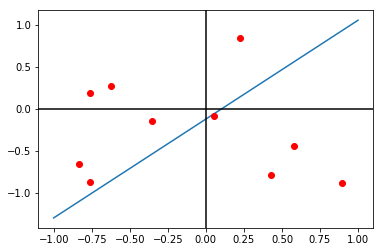

In [29]:
fig = plt.figure()
axes = plt.axes()
axes.plot(x_axis, y_axis)
plt.axhline(0, color='k')
plt.axvline(0, color='k')
axes.plot(x_vals, y_vals, 'ro')
plt.show()

The data is clearly linearly separable. The 6 points above the line are classified with value 1, while the 4 below have value 2.

The goal is now to create a prediction line separating the data that is the same as this.

We'll create a y-vector storing the values.

In [30]:
(weight, bias) = target_function
# weight, bias = create_target_function() # line is weight*x + bias
y = np.zeros(len(dataset)) # size 10

We'll fill up y with the actual values for x. These aren't "predictions" persay but actual ground-truth values.

In [31]:
for index in range(len(dataset)):
    x = dataset[index]
    x1, x2 = x[1], x[2] # b/c x[0] = x_0 is 1
    if weight*x1 + bias <= x2:
        true_val = 1
    else:
        true_val = -1
    y[index] = true_val

In [32]:
dataset, y

([array([ 1.        , -0.83357909, -0.65557992]),
  array([ 1.        , -0.62108246,  0.26966018]),
  array([ 1.        ,  0.22518042,  0.84570679]),
  array([ 1.        ,  0.05194516, -0.08916991]),
  array([ 1.        , -0.35100132, -0.14337638]),
  array([ 1.        ,  0.427136  , -0.79099269]),
  array([ 1.        , -0.76353379,  0.18367232]),
  array([ 1.        , -0.75880796, -0.87006413]),
  array([ 1.        ,  0.89793907, -0.8874835 ]),
  array([ 1.        ,  0.57937807, -0.44308955])],
 array([ 1.,  1.,  1., -1.,  1., -1.,  1.,  1., -1., -1.]))

Now we can see which truth values correspond to which elements.

Now, we want a target_function that will take the value in the dataset and return the corresponding value in the array.

In [36]:
list(dataset)

[array([ 1.        , -0.83357909, -0.65557992]),
 array([ 1.        , -0.62108246,  0.26966018]),
 array([ 1.        ,  0.22518042,  0.84570679]),
 array([ 1.        ,  0.05194516, -0.08916991]),
 array([ 1.        , -0.35100132, -0.14337638]),
 array([ 1.        ,  0.427136  , -0.79099269]),
 array([ 1.        , -0.76353379,  0.18367232]),
 array([ 1.        , -0.75880796, -0.87006413]),
 array([ 1.        ,  0.89793907, -0.8874835 ]),
 array([ 1.        ,  0.57937807, -0.44308955])]

In [41]:
np.where(dataset==np.array([ 1.        , -0.83357909, -0.65557992]))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))

In [42]:
def target_function(point):
    """
    take a point in the dataset and return the value 1 or -1, depending on if it's above/below the line.
    """
    
    x1, x2 = point[1], point[2] # b/c x[0] = x_0 is 1
    if weight*x1 + bias <= x2:
        return 1
    else:
        return -1

In [43]:
test = dataset[0]

In [44]:
test

array([ 1.        , -0.83357909, -0.65557992])

In [45]:
target_function(test)

1

Now, we'll create a weight vector and do things.

In [60]:
w = np.zeros(3)

In [61]:
done = False

In [62]:
while not done:
    num_wrong = 0
    for point in dataset:
        if np.sign(np.dot(w,point)) != target_function(point):
            w = np.add(w, target_function(point) * point) # move w in right direction
            num_wrong += 1
            break
            
    if num_wrong == 0:
        done = True

C:\Python35\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in add
  """
C:\Python35\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sign
  after removing the cwd from sys.path.


KeyboardInterrupt: 

In [64]:
w

array([ inf, -inf, -inf])

In [49]:
w

array([ 1.        , -1.71910335, -1.22198993])

In [50]:
params = np.delete(w,0)

In [51]:
params

array([-1.71910335, -1.22198993])

Now let's plot an overlay.

In [52]:
poly = np.poly1d(params)

In [53]:
poly

poly1d([-1.71910335, -1.22198993])

In [54]:
x_new = np.linspace(-1, 1)
y_new = poly(x_axis)

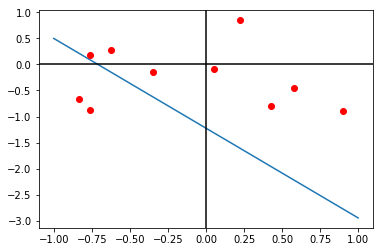

In [55]:
fig = plt.figure()
axes = plt.axes()
axes.plot(x_new, y_new)
plt.axhline(0, color='k')
plt.axvline(0, color='k')
axes.plot(x_vals, y_vals, 'ro')
plt.show()

In [58]:
for point in dataset:
    print(target_function(point))

1
1
1
-1
1
-1
1
1
-1
-1


In [59]:
for point in dataset:
    print(np.sign(np.dot(w, point)))

1.0
1.0
-1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [69]:
small_dataset = dataset[0:4]

In [70]:
small_dataset

[array([ 1.        , -0.83357909, -0.65557992]),
 array([ 1.        , -0.62108246,  0.26966018]),
 array([ 1.        ,  0.22518042,  0.84570679]),
 array([ 1.        ,  0.05194516, -0.08916991])]

In [71]:
x_vals = [x[1] for x in small_dataset]
y_vals = [x[2] for x in small_dataset]

polynomial = np.poly1d(target_function)

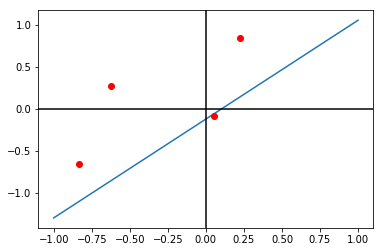

In [72]:
fig = plt.figure()
axes = plt.axes()
axes.plot(x_axis, y_axis)
plt.axhline(0, color='k')
plt.axvline(0, color='k')
axes.plot(x_vals, y_vals, 'ro')
plt.show()

In [73]:
for point in small_dataset:
    print(target_function(point))

1
1
1
-1


In [74]:
w = np.zeros(3)

In [ ]:
if np.sign(np.dot(w,point)) != target_function(point):
            w = np.add(w, target_function(point) * point) # move w in right direction
            num_wrong += 1
            break

In [75]:
point = small_dataset[0]

In [76]:
np.sign(np.dot(w,point))

0.0

In [77]:
target_function(point)

1

In [78]:
np.sign(np.dot(w,point)) == target_function(point)

False

In [79]:
target_function(point) * point

array([ 1.        , -0.83357909, -0.65557992])

In [80]:
w = np.add(w, target_function(point) * point)

In [81]:
w

array([ 1.        , -0.83357909, -0.65557992])

In [82]:
params = np.delete(w,0)

In [83]:
poly =  np.poly1d(params)

In [84]:
x_new = np.linspace(-1, 1)
y_new = poly(x_axis)

So after 1 iter we get this:

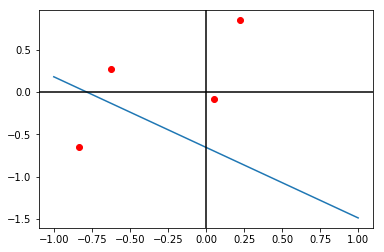

In [85]:
fig = plt.figure()
axes = plt.axes()
axes.plot(x_new, y_new)
plt.axhline(0, color='k')
plt.axvline(0, color='k')
axes.plot(x_vals, y_vals, 'ro')
plt.show()

In [86]:
w = np.add(w, target_function(small_dataset[1]) * small_dataset[1])

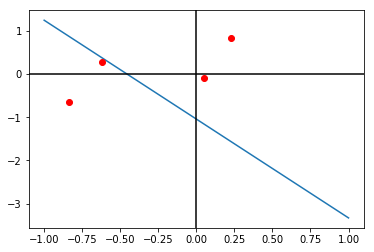

In [87]:
params = np.delete(w,0)

poly =  np.poly1d(params)
x_new = np.linspace(-1, 1)
y_new = poly(x_axis)

fig = plt.figure()
axes = plt.axes()
axes.plot(x_new, y_new)
plt.axhline(0, color='k')
plt.axvline(0, color='k')
axes.plot(x_vals, y_vals, 'ro')
plt.show()

In [88]:
w = np.add(w, target_function(small_dataset[3]) * small_dataset[3])

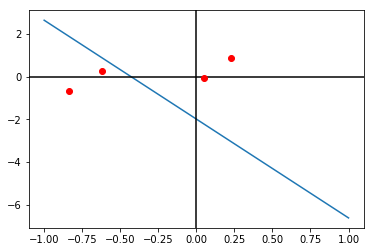

In [89]:
params = np.delete(w,0)

poly =  np.poly1d(params)
# x_new = np.linspace(-1, 1)
# y_new = poly(x_axis)

fig = plt.figure()
axes = plt.axes()
axes.plot(x_new, y_new)
plt.axhline(0, color='k')
plt.axvline(0, color='k')
axes.plot(x_vals, y_vals, 'ro')
plt.show()

In [90]:
w = np.add(w, target_function(small_dataset[3]) * small_dataset[3])

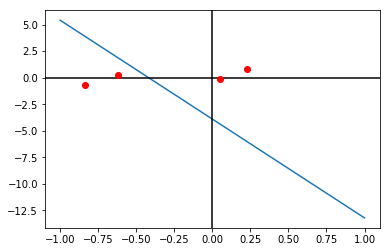

In [91]:
params = np.delete(w,0)

poly =  np.poly1d(params)
x_new = np.linspace(-1, 1)
y_new = poly(x_axis)

fig = plt.figure()
axes = plt.axes()
axes.plot(x_new, y_new)
plt.axhline(0, color='k')
plt.axvline(0, color='k')
axes.plot(x_vals, y_vals, 'ro')
plt.show()

In [93]:
w += 30*np.add(w, target_function(small_dataset[3]) * small_dataset[3])

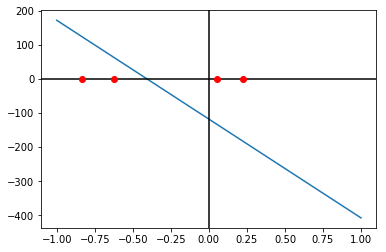

In [94]:
params = np.delete(w,0)

poly =  np.poly1d(params)
x_new = np.linspace(-1, 1)
y_new = poly(x_axis)

fig = plt.figure()
axes = plt.axes()
axes.plot(x_new, y_new)
plt.axhline(0, color='k')
plt.axvline(0, color='k')
axes.plot(x_vals, y_vals, 'ro')
plt.show()

In [96]:
w

array([ 249.        , -290.13109459, -118.1780596 ])

In [95]:
target_function(small_dataset[3])

-1

In [102]:
w = np.zeros(3)

In [103]:
done = False

In [104]:
small_dataset

[array([ 1.        , -0.83357909, -0.65557992]),
 array([ 1.        , -0.62108246,  0.26966018]),
 array([ 1.        ,  0.22518042,  0.84570679]),
 array([ 1.        ,  0.05194516, -0.08916991])]

In [105]:
for point in small_dataset:
    print(target_function(point))

1
1
1
-1


In [106]:
while not done:
    num_wrong = 0
    for point in small_dataset:
        if np.sign(np.dot(w,point)) != target_function(point):
            print("updating according to point: " + str(point))
            print("w predicts " + str(np.sign(np.dot(w,point))) + " while target is " + str(target_function(point)))
            w = np.add(w, target_function(point) * point) # move w in right direction
            print("w is now: " + str(w))
            num_wrong += 1
            break
            
    if num_wrong == 0:
        done = True

updating according to point: [ 1.         -0.83357909 -0.65557992]
w predicts 0.0 while target is 1
w is now: [ 1.         -0.83357909 -0.65557992]
updating according to point: [ 1.          0.05194516 -0.08916991]
w predicts 1.0 while target is -1
w is now: [ 0.         -0.88552426 -0.56641001]
updating according to point: [ 1.          0.22518042  0.84570679]
w predicts -1.0 while target is 1
w is now: [ 1.         -0.66034383  0.27929678]
updating according to point: [ 1.          0.05194516 -0.08916991]
w predicts 1.0 while target is -1
w is now: [ 0.         -0.712289    0.36846669]


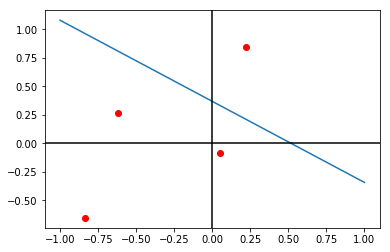

In [107]:
params = np.delete(w,0)

poly =  np.poly1d(params)
x_new = np.linspace(-1, 1)
y_new = poly(x_axis)

fig = plt.figure()
axes = plt.axes()
axes.plot(x_new, y_new)
plt.axhline(0, color='k')
plt.axvline(0, color='k')
axes.plot(x_vals, y_vals, 'ro')
plt.show()

In [108]:
for point in small_dataset:
    print(np.sign(np.dot(w,point)))

1.0
1.0
1.0
-1.0


## Problem 7

Now that we've written the code, let's try a number of tests with 10 training points.

In [295]:
dataset = create_dataset(size=10)
target_function = create_target_function()

In [296]:
dataset, target_function

([array([ 0.50447079,  0.44472886]),
  array([-0.34692215,  0.34655712]),
  array([-0.64452244, -0.77717203]),
  array([ 0.91292556, -0.14183649]),
  array([-0.76035426,  0.79586278]),
  array([-0.43567624, -0.72772066]),
  array([ 0.95099553, -0.20865969]),
  array([ 0.90991103, -0.80259751]),
  array([ 0.1466349 ,  0.53204653]),
  array([ 0.74161213, -0.19608327])],
 (-1.0734419554609853, -0.73607613101628888))

In [307]:
x_vals = [x[0] for x in dataset]
y_vals = [x[1] for x in dataset]

polynomial = np.poly1d(target_function)

x_axis = np.linspace(-1, 1)
y_axis = polynomial(x_axis)

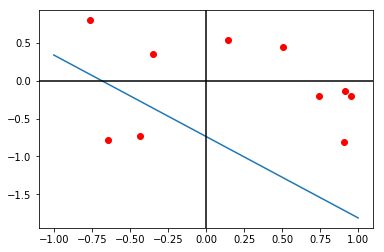

In [308]:
fig = plt.figure()
axes = plt.axes()
axes.plot(x_axis, y_axis)
plt.axhline(0, color='k')
plt.axvline(0, color='k')
axes.plot(x_vals, y_vals, 'ro')
plt.show()

In [303]:
y_vals = eval_target_function(dataset, target_function)

In [304]:
y_vals

array([ 1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1.])

This makes sense. We have two points that are "under" the line.

In [309]:
w = np.zeros(2) # init weight vector to 2 zeros: inner product of w,x is 0 --> sign(wTx) = 0
indices = [i for i in range(len(dataset))]
misclassified_indices = indices # everything is misclassified at first

In [310]:
misclassified_indices

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Let's do one iteration.

In [311]:
chosen_idx = random.choice(misclassified_indices)
print("chosen idx: " + str(chosen_idx))
chosen_value = dataset[chosen_idx]

# update weight vector: w <-- w + y_n * x_n
w = w + np.multiply(y_vals[chosen_idx], dataset[chosen_idx]) # the second element is (1,2) since mult el't-wise.
print("new weight vector: " + str(w))

# update misclassified indices
misclassified_indices = get_all_misclassified(dataset, target_function, w)
print("misclassifieds now: " + str(misclassified_indices))

chosen idx: 7
new weight vector: [-0.73029233  0.64416277]
misclassifieds now: [0, 3, 6, 7, 9]


Let's see what graph looks like after one iter.

In [312]:
polynomial = np.poly1d(w)

x_axis = np.linspace(-1, 1)
y_axis = polynomial(x_axis)

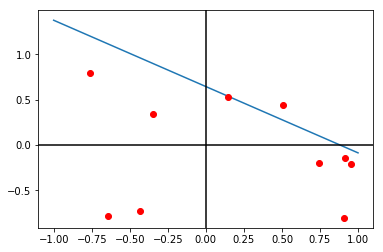

In [313]:
fig = plt.figure()
axes = plt.axes()
axes.plot(x_axis, y_axis)
plt.axhline(0, color='k')
plt.axvline(0, color='k')
axes.plot(x_vals, y_vals, 'ro')
plt.show()

In [314]:
chosen_idx = random.choice(misclassified_indices)
print("chosen idx: " + str(chosen_idx))
chosen_value = dataset[chosen_idx]

# update weight vector: w <-- w + y_n * x_n
w = w + np.multiply(y_vals[chosen_idx], dataset[chosen_idx]) # the second element is (1,2) since mult el't-wise.
print("new weight vector: " + str(w))

# update misclassified indices
misclassified_indices = get_all_misclassified(dataset, target_function, w)
print("misclassifieds now: " + str(misclassified_indices))

chosen idx: 6
new weight vector: [-0.92872676  0.68770163]
misclassifieds now: [0, 2, 3, 6, 7, 9]


In [315]:
chosen_idx = random.choice(misclassified_indices)
print("chosen idx: " + str(chosen_idx))
chosen_value = dataset[chosen_idx]

# update weight vector: w <-- w + y_n * x_n
w = w + np.multiply(y_vals[chosen_idx], dataset[chosen_idx]) # the second element is (1,2) since mult el't-wise.
print("new weight vector: " + str(w))

# update misclassified indices
misclassified_indices = get_all_misclassified(dataset, target_function, w)
print("misclassifieds now: " + str(misclassified_indices))

chosen idx: 6
new weight vector: [-1.12716119  0.7312405 ]
misclassifieds now: [0, 2, 3, 6, 7, 9]


In [316]:
chosen_idx = random.choice(misclassified_indices)
print("chosen idx: " + str(chosen_idx))
chosen_value = dataset[chosen_idx]

# update weight vector: w <-- w + y_n * x_n
w = w + np.multiply(y_vals[chosen_idx], dataset[chosen_idx]) # the second element is (1,2) since mult el't-wise.
print("new weight vector: " + str(w))

# update misclassified indices
misclassified_indices = get_all_misclassified(dataset, target_function, w)
print("misclassifieds now: " + str(misclassified_indices))

chosen idx: 3
new weight vector: [-1.25664735  0.75135809]
misclassifieds now: [0, 2, 3, 5, 6, 7, 9]


In [317]:
chosen_idx = random.choice(misclassified_indices)
print("chosen idx: " + str(chosen_idx))
chosen_value = dataset[chosen_idx]

# update weight vector: w <-- w + y_n * x_n
w = w + np.multiply(y_vals[chosen_idx], dataset[chosen_idx]) # the second element is (1,2) since mult el't-wise.
print("new weight vector: " + str(w))

# update misclassified indices
misclassified_indices = get_all_misclassified(dataset, target_function, w)
print("misclassifieds now: " + str(misclassified_indices))

chosen idx: 5
new weight vector: [-0.93959675  1.28093545]
misclassifieds now: [3, 6, 7, 9]


In [318]:
for i in range(7):
    chosen_idx = random.choice(misclassified_indices)
    print("chosen idx: " + str(chosen_idx))
    chosen_value = dataset[chosen_idx]

    # update weight vector: w <-- w + y_n * x_n
    w = w + np.multiply(y_vals[chosen_idx], dataset[chosen_idx]) # the second element is (1,2) since mult el't-wise.
    print("new weight vector: " + str(w))

    # update misclassified indices
    misclassified_indices = get_all_misclassified(dataset, target_function, w)
    print("misclassifieds now: " + str(misclassified_indices))

chosen idx: 7
new weight vector: [-1.66988908  1.92509821]
misclassifieds now: [3, 6, 7, 9]
chosen idx: 7
new weight vector: [-2.4001814   2.56926098]
misclassifieds now: [0, 3, 6, 7, 9]
chosen idx: 3
new weight vector: [-2.52966756  2.58937857]
misclassifieds now: [0, 3, 6, 7, 9]
chosen idx: 3
new weight vector: [-2.65915371  2.60949616]
misclassifieds now: [0, 3, 6, 7, 9]
chosen idx: 7
new weight vector: [-3.38944604  3.25365892]
misclassifieds now: [0, 3, 6, 7, 9]
chosen idx: 6
new weight vector: [-3.58788047  3.29719779]
misclassifieds now: [0, 3, 6, 7, 9]
chosen idx: 0
new weight vector: [-3.36352775  3.49498155]
misclassifieds now: [0, 3, 6, 7, 9]


In [292]:
PLA(dataset, target_function)

(0, 1)

In [293]:
run_experiments(10, 20) # 20 times

dataset: [array([-0.91887986,  0.12242646]), array([ 0.29485131,  0.36714039]), array([-0.75202978,  0.55250081]), array([-0.08770358,  0.37521122]), array([ 0.42128342, -0.28876555]), array([-0.8781402 , -0.97776301]), array([-0.96335881, -0.35727012]), array([ 0.90668915, -0.9141707 ]), array([-0.0141492 ,  0.58359236]), array([ 0.7289281 , -0.80355146])]
target function: (0.54930840235756095, 0.30138891179843041)


KeyboardInterrupt: 